# Vježba 6 - Obrada audio signala

<p>Uobičajen način za predstavljanje diskretnih sistema (filtara) je korištenjem jednačina diferencija. Često korištena klasa diskretnih filtara su linearni vremenski nepromjenljivi filtri. Oni se mogu opisati linearnim jednačinama diferencija sa konstantnim koeficijentima, kao u jednačini:
$$\sum_{k=0}^{N}{a_k y(n-k)} = \sum_{l=0}^{M}{b_l x(n-l)}.$$
U ovoj jednačini, ulazni signal u filtar je označen sa $x(n)$, a izlazni sa $y(n)$. Koeficijenti jednačine diferencija su $a_k$ i $b_l$. U Python-u jednačina diferencija se može predstaviti korištenjem dva vektora: jedan vektor sadrži koeficijente u direktnoj sprezi $b_l$, a drugi koeficijente u povratnoj sprezi $a_k$. Obično se smatra da je koeficijent $a_0 \ne 0$ pa se može
pisati:
$$y(n) = - \frac{1}{a_0}\sum_{k=1}^{N}{a_k y(n-k)} + \frac{1}{a_0}\sum_{l=0}^{M}{b_l x(n-l)}.$$
U Python-u je gornja jednačina implementirana funkcijom <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html">lfilter</a> iz scipy biblioteke.
</p>
<p>Ipak, u ovoj vježbi ćemo napisati i sopstvenu implementaciju funkcije kojom se realizuje filtriranje, kako bismo se pripremili za rad sa opštijim slučajem vremenski promjenljivih i nelinearnih filtara. Diskretni sistemi se opisuju blok-dijagramima. Osnovni elementi koji se koriste na blok-dijagramima su:
<ol>
<li>elementi za kašnjenje (memorisanje prethodnih stanja),</li>
<li>množači (operacija množenja konstantom),</li>
<li>sabirači (operacija sabiranja).</li>
</ol>
</p>
<p>Ako diskretni filtar ima beskonačan impulsni odziv (Infinite Impulse Response – IIR) njegov blok dijagram izgleda kao na slici:
<img src="images/iir.png">
Koeficijenti IIR filtara se u Python-u mogu odrediti korištenjem funkcije <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html">butter</a> iz biblioteke scipy. Parametar $W_n$ predstavlja normaliyovanu frekvenciju i računa se na sljedeći način:
$$W_n = \frac{2F_c}{F_s},$$
gdje je $F_c$ granična frekvencija filtra (u Hz), a $F_s$ frekvencija odmjeravanja (u Hz).
</p>
<p>Ako diskretni filtar ima konačan impulsni odziv njegova, njegova jednačina diferencija se može svesti na oblik:
$$y(n) = \sum_{k=0}^{M}{h_k y(n-k)},$$
a odgovarajući blok dijagram je dat na sledećoj slici:
<img src="images/fir.png">
</p>
<p>
Linearni, vremenski nepromjenljivi filtri se u obradi audio signala najčešće koriste za implementaciju ekvilajzera (bass/treble kontrole ili grafički ekvilajzer), što je oblik frekvencijski selektivnog filtriranja, kao i za dodavanje eha ili reverberacija u audio signal čime se dobija signal čije je zvučanje prirodnije.
</p>
<p>
Za određivanje frekvencijske karakteristike filtra koristi se funkcija <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html">freqz</a> iz scipy biblioteke.
</p>
<p>
U digitalnim audio efektima često se koriste i vremenski promjenljivi kao i nelinearni filtri. Jedan od takvih efekata je i flanging. Originalno, ovaj efekat se pomoću analogne opreme proizvodio tako što je kombinovan isti signal sa dva magnetofona, ali uz variranje vremenske razlike $\delta t$ između njih. Promjenljiva vremenska razlika se postiže tako što operator ručno mijenja brzinu reprodukcije magnetofona. U digitalnom obliku flanging se može postići pomoću vremenski promjenljivog FIR filtra čija je jednačina diferencija data sa
$$y(n) = x(n) + \alpha x(n - \beta (n)).$$
Ako se želi generisanje kašnjenja koje iznosi do $R$ odmjeraka onda se flanging efekat može postići periodičnim variranjem kašnjenja $\beta (n)$
$$\beta (n) = \frac{R}{2} (1 - cos(2 \pi \frac{F_0}{F_s} n)),$$
gdje je $F_0$ frekvencija sa kojom se mijenja kašnjenje, a $F_s$ frekvencija odmjeravanja signala. Na sličan način se mogu postići i drugi audio efekti.
</p>

### Zadaci

<ol>
<li>Napisati funkciju u Python-u kojom će se realizovati diskretni filtar drugog reda čija je jednačina diferencija data sa:
$$y(n) = b_0 x(n) + b_1 x(n-1) + b_2 x(n-2) - a_1 y(n-1) - a_2 y(n-2).$$
Ulazni argumenti funkcije treba da budu vektori a i b sa koeficijentima jednačine diferencija, te vektor x u kojem su odmjerci ulaznog signala. Izlazni argument je vektor y u kojem su odmjerci izlaznog signala.
</li>
</ol>

In [1]:
### KOD
%matplotlib notebook
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile

def filter_second_rand_(x, a, b):
    out_data = np.zeros(len(x))
    x_data = copy.deepcopy(x)
    # we add 2 zeros at the end so n-1 multiplied, is 0 when it is out of range, not to taken the last value
    x_data = np.append(x_data, [0, 0])
    for i in np.arange(len(x)):
        y[i] = b[0] * x_data[i] + b[1] * x_data[i-1] + b[2] * x_data[i-2] - a[1] * y[i-1] - a[2] * y[i-2]
    return out_data
    
def filter_second_rand(x, a, b):
    y = np.zeros(len(x))
    for i, value in enumerate(y):
        y[i] += (b[0] * (x[i] if i >= 0 else 0))
        y[i] += (b[1] * (x[i - 1] if i >= 1 else 0))
        y[i] += (b[2] * (x[i - 2] if i >= 2 else 0))
        y[i] -= (a[1] * (y[i - 1] if i > 1 else 0)) 
        y[i] -= (a[2] * (y[i - 2] if i > 2 else 0))
    return y

<ol start = "2">
<li> Učitati zvučni signal u fajlu <i>acoustic.wav</i>. Koristeći funkciju butter odrediti koeficijente niskopropusnih filtara drugog reda sa graničnim frekvencijama od 32, 125, 500, 1k, 2k i 5kHz. Nacrtati amplitudne i fazne karakteristike ovih filtara.
Propustiti signal kroz ove filtre koristeći funkciju iz tačke 1. Prikazati i poslušati originalni i rezultujuće signale. Nacrtati spektrogram originalnog i filtriranog signala korištenjem Hemingovog prozora dužine 1024 i preklapanja od 256 odmjeraka. Komentarisati rezultate. Koristeći funkciju butter odrediti koeficijente visokopropusnih filtara drugog reda sa graničnim frekvencijama od 32, 125, 500, 1k, 2k i 5kHz. Nacrtati amplitudne i fazne karakteristike ovih filtara. Propustiti signal kroz ove filtre koristeći funkciju iz tačke 1. Prikazati i poslušati originalni i rezultujuće signale. Nacrtati spektrogram originalnog i filtriranog signala korištenjem Hemingovog prozora dužine 1024 i preklapanja od 256 odmjeraka. Komentarisati rezultate. Koristeći funkciju butter odrediti koeficijente filtara propusnika opsega drugog reda sa graničnim frekvencijama od 32, 125, 500, 1k, 2k i 5kHz. Pošto propusnik opsega ima dvije granične frekvencije izaberite po dvije iz prethodno ponuđne liste. Takođe, zbog načina projektovanja filtara propusnika opsega rezultujući filtar će biti dvostruko višeg reda od specificiranog. Zato, da bi se dobio propusnik opsega drugog reda treba zadati $N = 1$. Nacrtati amplitudne i fazne
karakteristike ovih filtara. Propustiti signal kroz ove filtre koristeći funkciju iz tačke 1. Prikazati i poslušati originalni i rezultujuće signale. Nacrtati spektrogram originalnog i filtriranog signala korištenjem Hemingovog prozora dužine 1024 i preklapanja od 256 odmjeraka. Komentarisati rezultate.
</li>
</ol>

a= [ 1.         -1.60109239  0.66836899] b= [0.01681915 0.0336383  0.01681915]


<IPython.core.display.Javascript object>


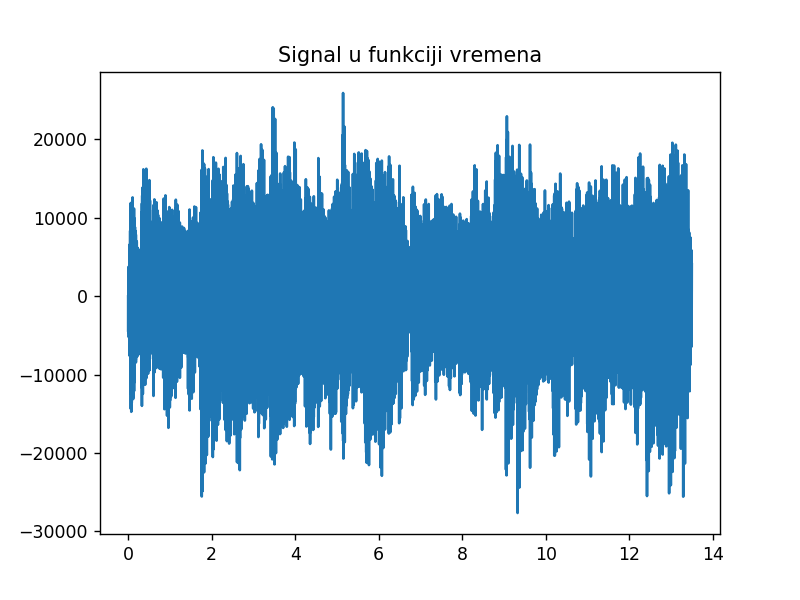

<IPython.core.display.Javascript object>


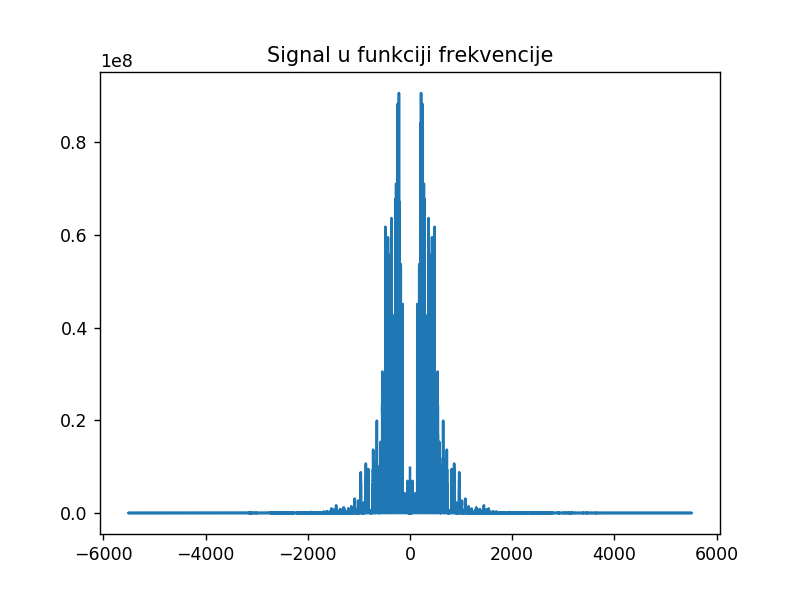

<IPython.core.display.Javascript object>


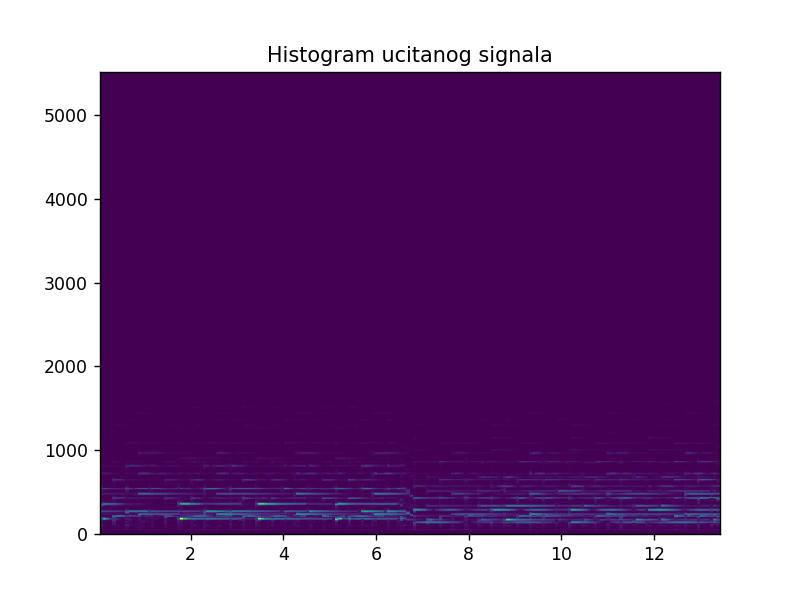

Text(0.5,1,'Histogram ucitanog signala')

In [2]:
### KOD
from numpy.fft import fft, ifft, fftfreq, rfft

Fs, x = wavfile.read('acoustic.wav')
#sd.play(x, Fs, blocking=True)


step = 1 / Fs
duration = x.shape[0] / Fs
time = np.arange(0, duration, step)

frequencies = [32, 125, 500, 1000, 2000, 5000]

b, a  = signal.butter(2, 2 * frequencies[2] / Fs, btype='lowpass')
print('a=', a, 'b=', b)
y = filter_second_rand(x, a, b)   # my filter implementation 
# y = signal.lfilter(b, a, x)   # System filter

N = len(time)
freq = fftfreq(N, 1 / Fs)
xdft = fft(y, N)

plt.figure()
plt.plot(time, y)
plt.title('Signal u funkciji vremena')
plt.show()

plt.figure()
plt.plot(freq, np.abs(xdft))
plt.title('Signal u funkciji frekvencije')
plt.show()

sd.play(y, Fs, blocking=False)
f, t, Szz = signal.spectrogram(y, fs=Fs, window=np.hamming(M=1024), noverlap=256, mode='magnitude')
plt.figure()
plt.pcolormesh(t, f, Szz)
plt.title('Histogram ucitanog signala')

<IPython.core.display.Javascript object>


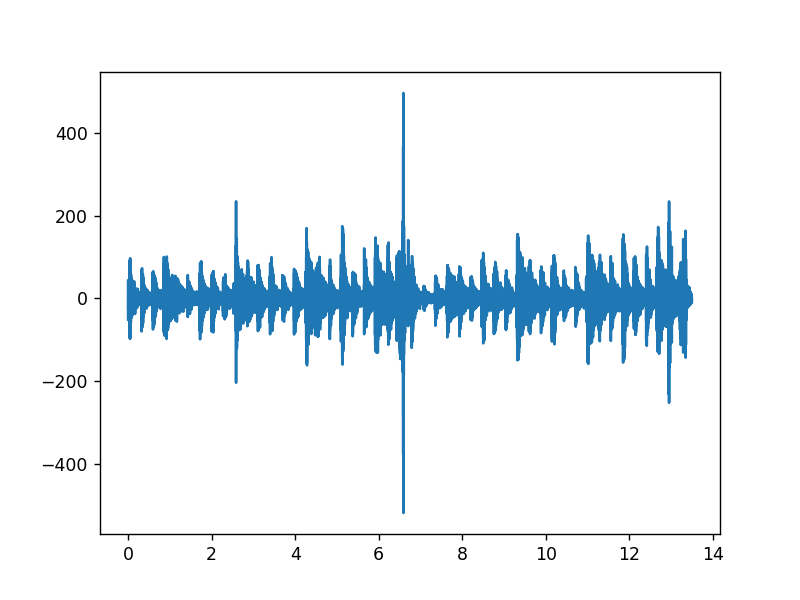

<IPython.core.display.Javascript object>


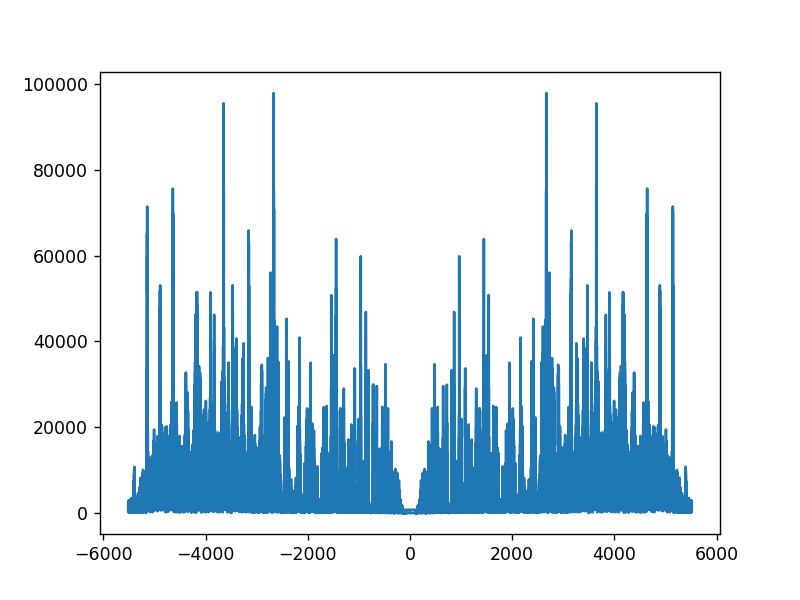

<IPython.core.display.Javascript object>


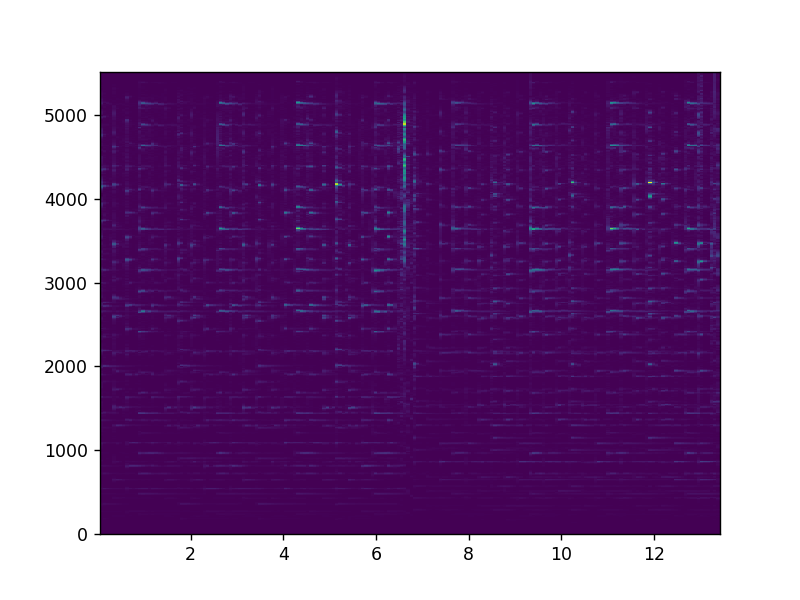

In [3]:
Fs, x = wavfile.read('acoustic.wav')
step = 1 / Fs
duration = x.shape[0] / Fs
time = np.arange(0, duration, step)
frequencies = [32, 125, 500, 1000, 2000, 5000]
b, a  = signal.butter(2, 2 * frequencies[5] / Fs, btype='highpass')
y = filter_second_rand(x, a, b)   # my filter implementation 
# y = signal.lfilter(b, a, x)   # System filter
N = len(time)
freq = fftfreq(N, 1 / Fs)
xdft = fft(y, N)
plt.figure()
plt.plot(time, y)
plt.figure()
plt.plot(freq, np.abs(xdft))
f, t, Szz = signal.spectrogram(y, fs=Fs, window=np.hamming(M=1024), noverlap=256, mode='magnitude')
plt.figure()
plt.pcolormesh(t, f, Szz)

<IPython.core.display.Javascript object>


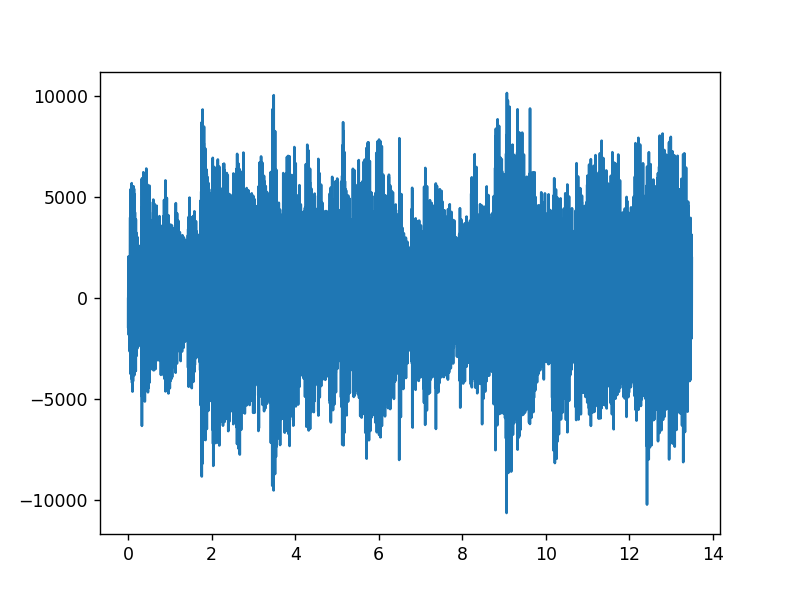

<IPython.core.display.Javascript object>


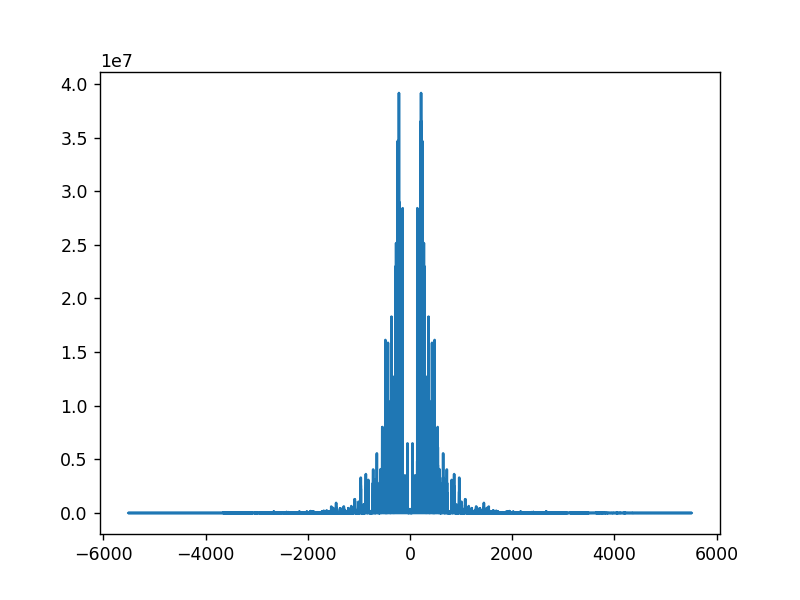

<IPython.core.display.Javascript object>


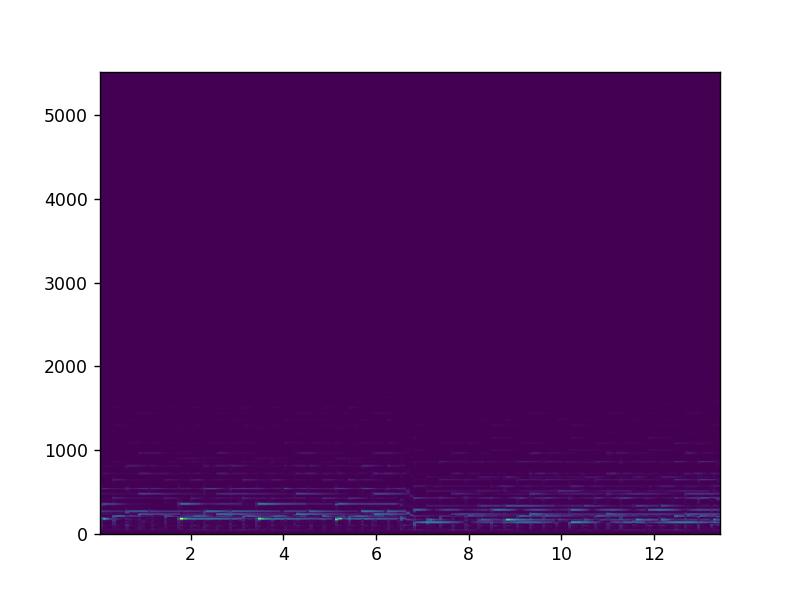

In [4]:
Fs, x = wavfile.read('acoustic.wav')
step = 1 / Fs
duration = x.shape[0] / Fs
time = np.arange(0, duration, step)
frequencies = [32, 125, 500, 1000, 2000, 5000]
b, a  = signal.butter(1, [2 * frequencies[0] / Fs, 2 * frequencies[1] / Fs], btype='bandpass')
y = filter_second_rand(x, a, b)   # my filter implementation 
# y = signal.lfilter(b, a, x)   # System filter
N = len(time)
freq = fftfreq(N, 1 / Fs)
xdft = fft(y, N)
plt.figure()
plt.plot(time, y)
plt.figure()
plt.plot(freq, np.abs(xdft))
f, t, Szz = signal.spectrogram(y, fs=Fs, window=np.hamming(M=1024), noverlap=256, mode='magnitude')
plt.figure()
plt.pcolormesh(t, f, Szz)

<ol start = "3">
<li> Reverberacije su jedan od najčešće korištenih audio efekata u muzičkoj produkciji i nastaju kada se zvuk odbija od prepreka u prostoru i različtim putanjama stiže do slušaoca. Najčešće se javljaju u velikim zatvorenim prostorijama. Postoji više metoda za implementaciju reverberacija, a najjednostavniji je korištenjem FIR filtra. Da bi se generisali višestruki odjeci između kojih je kašnjenje od R odmjeraka sa eksponencijalno opadajućim amplitudama moguće je koristiti FIR filtar oblika:
$$y(n) = x(n) + \alpha x(n-R) + \alpha^{2} x(n-2R) + ... + \alpha^{N-1} x(n-(N-1)R).$$
Napisati program u Python-u koji će implementirati dodavanje reverberacija u audio signal korištenjem gornje jednačine. Program testirati na zvučnom primjeru korištenom u prethodnim tačkama sa parametrima: $\alpha = 0.8, N = 6, R = 4$.
</li>
</ol>

In [5]:
### KOD
import numpy as np
import sounddevice as sd
from scipy.io import wavfile

def reverberation(x, alfa, N, R):
    out_data = np.zeros(len(x))
    for i, val in enumerate(out_data):
        for n in range(N):
            out_data[i] += ((alfa ** n) * (x[i - n*R] if (i - n*R) > 0 else 0))
    return out_data / np.max(out_data)


Fs, x = wavfile.read('acoustic.wav')
sd.play(x, Fs, blocking=True)

# Reverberation effect parameters
alfa = 0.8
N = 6
R = 4

data = reverberation(x, alfa, N, R)
print(data)
sd.play(data, Fs)

[ 0.         -0.0586669  -0.07432414 ...  0.18972943  0.17624091
  0.16658902]


<ol start = "4">
<li> Napisati program u Python-u kojim će biti implementiran flanging efekat. Efekat demonstrirati na signalu korištenom u prethodnim tačkama, za $F_0 = 1Hz$ i $T_m = 10ms$, $ \alpha = 1$. Da biste ovo postigli potrebno je izračunati maksimalno
kašnjenje izraženo u broju odmjeraka $R$ i imati u vidu činjenicu da za implementaciju filtra $\beta (n)$ mora imati cjelobrojnu vrijednost. Reprodukovati dobijeni signal.
</li>
</ol>

In [ ]:
### KOD
# result of round() is floating point, and for int() is number type int
def betaFunction(i, R, F0, Fs):
    return int((R / 2) * (1 - np.cos(2 * np.pi * (F0 / Fs) * i)))

def flanging_efect(x, F0, Fs, Tm, alfa):
    R = Fs * (Tm / 1000)
    out_data = np.zeros(len(x))
    for i, value in enumerate(out_data):
        out_data[i] = x[i] + (alfa * x[(i - betaFunction(i, R, F0, Fs)) if (i - betaFunction(i, R, F0, Fs)) >= 0 else 0])
    return out_data / np.max(out_data)

    
Fs, x = wavfile.read('acoustic.wav')

# Flanging effect parameters
F0 = 1
Tm = 10
alfa = 5

data = flanging_efect(x, F0, Fs, Tm, alfa)

sd.play(data, Fs, blocking=True)